In [1]:
from experiments.utils.pass_managers import build_pm
from experiments.utils.coupling_maps import file_to_coupling_map
from experiments.utils.circuits      import directory_to_circuits
from qiskit.transpiler.passes.routing.sabre_swap import SabreSwap
from qiskit.transpiler.passes.layout.sabre_layout import SabreLayout


Build pass managers

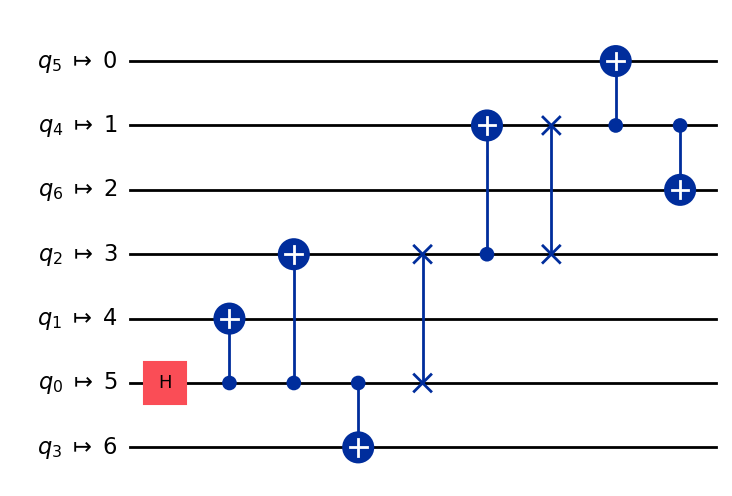

In [2]:
coupling_map = file_to_coupling_map('experiments/coupling_maps/hex_007.txt')
circuits, _  = directory_to_circuits('experiments/circuits/ghz/')
qc = circuits[5]

seed = 42

routing_pass = SabreSwap(coupling_map, seed=seed)
layout_pass  = SabreLayout(coupling_map, routing_pass, seed=seed)

pass_manager = build_pm(coupling_map, routing_pass, layout_pass)

qc_tr = pass_manager.run(qc)
qc_tr.draw(output='mpl')

43
43
43
43


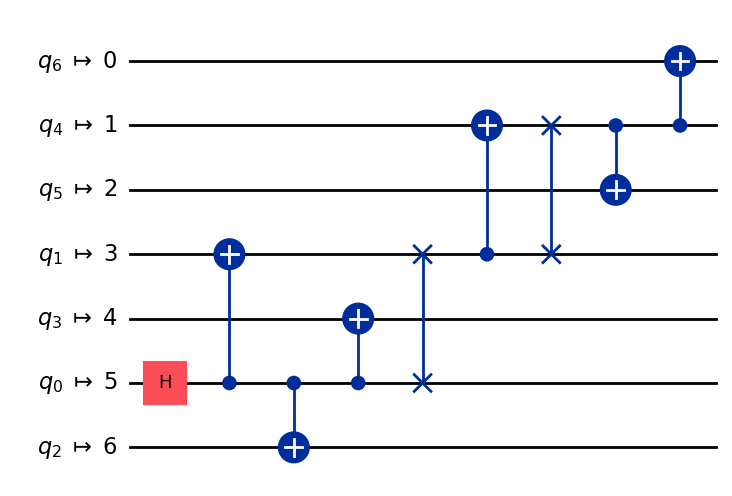

In [3]:
# Change the seed of the routing pass and the layout pass in the pass manager
seed = 43
pass_manager._tasks[0][0].seed = seed
pass_manager._tasks[0][4].seed = seed

# Confirm that the seed of the routing pass and the layout pass have changed
print(pass_manager._tasks[0][0].seed)
print(pass_manager._tasks[0][4].seed)
print(layout_pass.seed)
print(routing_pass.seed)

qc_tr = pass_manager.run(qc)
qc_tr.draw(output='mpl')